# Beleg 1- Ela Kilic 593982

## SVM

### Daten

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

### Funktionen

In [2]:
def linear_model(theta):
    def model(x):
        y = []
        for xi in x:
            yi = theta[0] + np.dot(theta[1:], xi)
            y.append(yi)
        return np.array(y)

    return model


def grad_linear_model(x, theta):
    G = np.zeros([len(x), len(theta)])
    for i in range(len(x)):
        G[i][0] = 1
        G[i][1:] = x[i]
    return G

In [3]:
def hinge_cost_function(x, y, model_fct, C=1.0):
    def func(theta):
        reg = 0.5 * np.dot(theta[1:], theta[1:]) #1/2 * ||theta||^2_2
        predictions = model_fct(theta)(x) #h_theta(x)
        loss = C * np.sum(np.maximum(0, 1 - y * predictions))
        return reg + loss

    return func


def grad_hinge_cost_function(x, y, theta, model_fct, model_grad_fct, C=1.0):
    #regularisierung
    grad = np.zeros_like(theta)
    grad[1:] = theta[1:] #falls j!=0 nimm theta_j

    #fehlerteil
    predictions = model_fct(theta)(x) #h_theta(x)
    G = model_grad_fct(x, theta)

    for i in range(len(y)):
        # falls y(i) * h_theta(x(i)) < 1 (0?)
        if y[i] * predictions[i] < 1:
            grad[1:] -= C * y[i] * G[i][1:]
    return grad

In [4]:
def update_theta_svm(x, y, theta, alpha, cost_grad, model_fct, model_grad_fct, C):
    grad = cost_grad(x, y, theta, model_fct, model_grad_fct, C)
    return theta - alpha * grad

def gradient_descent_svm(x, y, num_parameters, model_fct, model_grad_fct, cost_fct, cost_grad_fct,
                         epsilon=1E-4, alpha=0.0001, verbose=False, max_iterations=10000, C=1.0):

    costs, thetas = [], []
    theta = np.zeros(num_parameters)

    J = cost_fct(x, y, model_fct, C)

    for i in range(max_iterations + 1):
        grad = cost_grad_fct(x, y, theta, model_fct, model_grad_fct, C)
        grad_norm = np.linalg.norm(grad)

        costs.append(J(theta))
        thetas.append(theta.copy())

        if grad_norm < epsilon:
            break

        theta = theta - alpha * grad
        #theta = update_theta_svm(x, y, theta, alpha, cost_grad_fct, model_fct, model_grad_fct, C)

    if verbose:
        print("final result")
        print(f"\tcost: {costs[-1]}, \n\ttheta: {thetas[-1]}, "
              f"\n\tnumber of iterations: {i}, \n\tgradient: {grad_norm}")
        print(f"testing- eps: {epsilon}, alp: {alpha}, C: {C}")
    return costs, thetas

### Plot

In [5]:
def plot_svm(x, y, theta):
    plt.figure(figsize=(8, 6))

    #datenpunkte-- setosa vs other
    plt.scatter(x[y == 1, 0], x[y == 1, 1], marker='x', color='tab:blue', label='setosa')
    plt.scatter(x[y == -1, 0], x[y == -1, 1], marker='x', color='tab:orange', label='other')

    #entscheidungsgrenze: theta0 + theta1*x1 + theta2*x2 = 0
    x_vals = np.array([x[:, 0].min() - 0.2, x[:, 0].max() + 0.2])
    y_vals = -(theta[1] * x_vals + theta[0]) / theta[2]

    plt.plot(x_vals, y_vals, color='red', label='linear SVM')

    plt.xlabel('sepal length (cm)')
    plt.ylabel('sepal width (cm)')
    plt.legend()
    plt.show()

In [6]:
iris = datasets.load_iris()
x = iris.data[:, :2]  # sepal length, sepal width
# y = 1 für setosa, y = -1 für anderen
y = np.where(iris.target == 0, 1, -1)

mean = x.mean(axis=0)
sigma = x.std(axis=0) #standardabweichung
x_normalisiert = (x-mean)/sigma #echter wert - abweichung




#### Normalisiert

final result
	cost: 4.223357867485115, 
	theta: [ 0.         -1.09028099  1.00808501], 
	number of iterations: 30000, 
	gradient: 0.07070621794201641
testing- eps: 0.001, alp: 0.01, C: 0.1


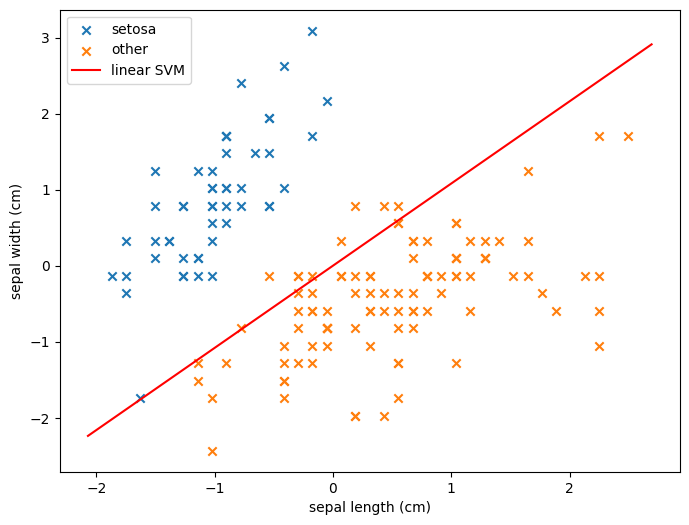

In [7]:
costs_norm, thetas_norm = gradient_descent_svm(
   x_normalisiert, y, 3,
   linear_model, grad_linear_model,
   hinge_cost_function, grad_hinge_cost_function,
   epsilon=0.001, alpha=0.01,
   verbose=True, max_iterations=30000,
   C=0.1)

plot_svm(x_normalisiert, y, thetas_norm[-1])


#### Nicht-Normalisiert

final result
	cost: 5.338398205877109, 
	theta: [ 0.        -1.2366844  1.9592797], 
	number of iterations: 30000, 
	gradient: 24.508310762101793
testing- eps: 0.001, alp: 0.01, C: 0.1


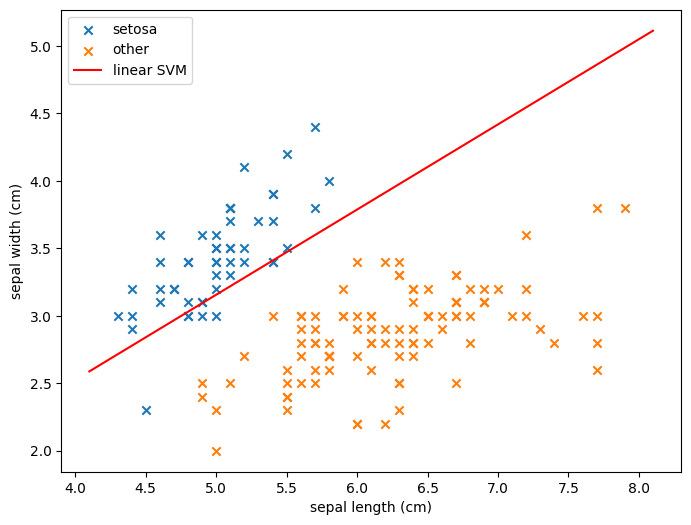

In [8]:
costs, thetas = gradient_descent_svm(
   x, y, 3,
   linear_model, grad_linear_model,
   hinge_cost_function, grad_hinge_cost_function,
   epsilon=0.001, alpha=0.01,
   verbose=True, max_iterations=30000,
   C=0.1)
   
plot_svm(x, y, thetas[-1])

#### Verschiedene C

final result
	cost: 0.14126202112347497, 
	theta: [ 0.         -0.09386922  0.07894418], 
	number of iterations: 258, 
	gradient: 0.009915598610923454
testing- eps: 0.01, alp: 0.01, C: 0.001


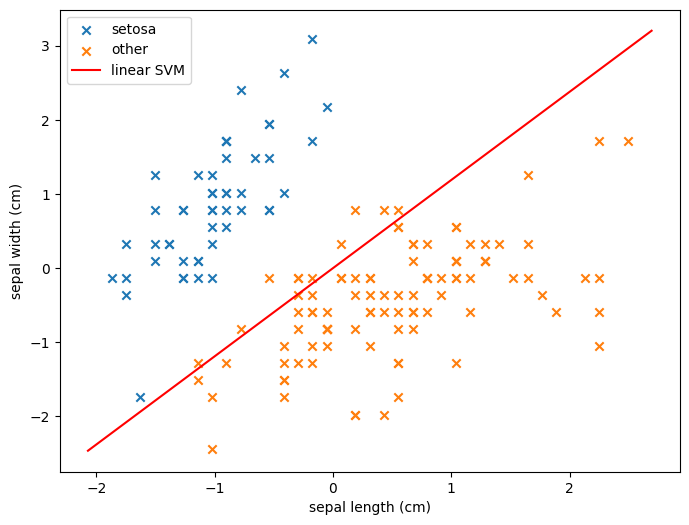

final result
	cost: 0.8705753667861871, 
	theta: [ 0.         -0.60566617  0.4474913 ], 
	number of iterations: 206, 
	gradient: 0.005524335498537056
testing- eps: 0.01, alp: 0.01, C: 0.01


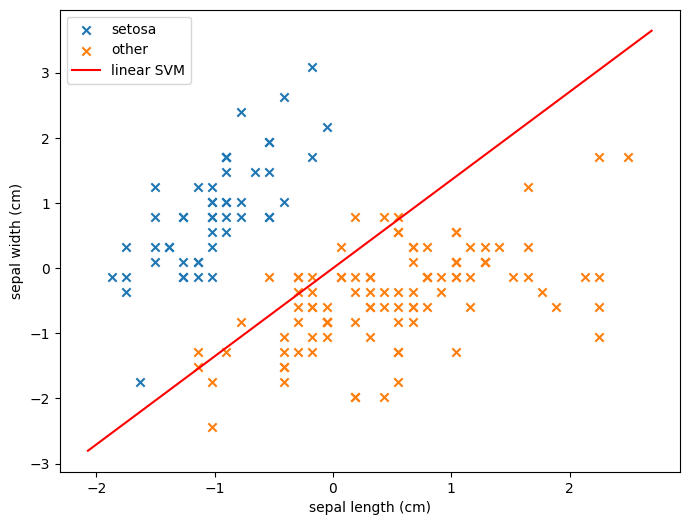

final result
	cost: 4.223357867485115, 
	theta: [ 0.         -1.09028099  1.00808501], 
	number of iterations: 30000, 
	gradient: 0.07070621794201641
testing- eps: 0.01, alp: 0.01, C: 0.1


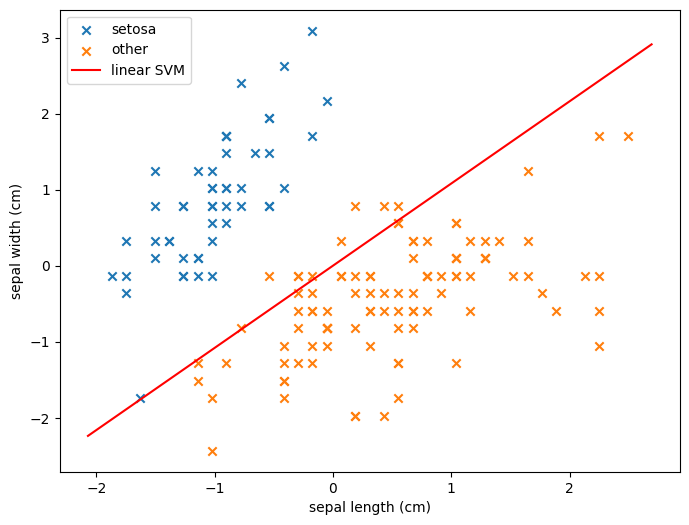

final result
	cost: 26.62357191234156, 
	theta: [ 0.         -2.02205341  1.86784952], 
	number of iterations: 30000, 
	gradient: 0.2451523780147727
testing- eps: 0.01, alp: 0.01, C: 1


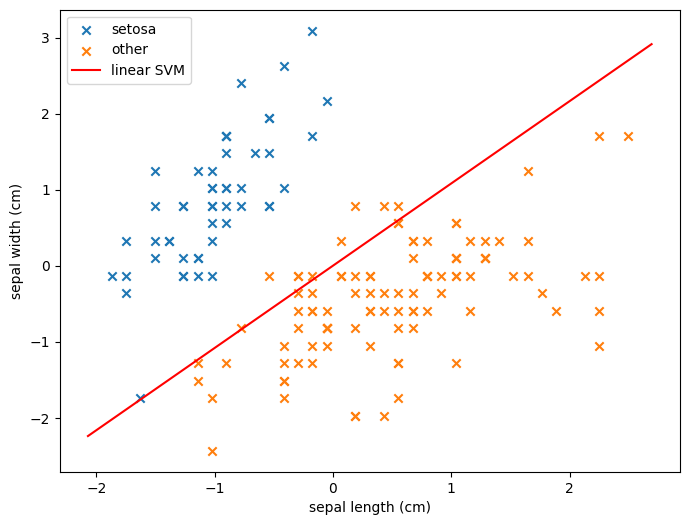

final result
	cost: 223.04178236216936, 
	theta: [ 0.         -2.58990228  2.48756164], 
	number of iterations: 30000, 
	gradient: 9.310300270768591
testing- eps: 0.01, alp: 0.01, C: 10


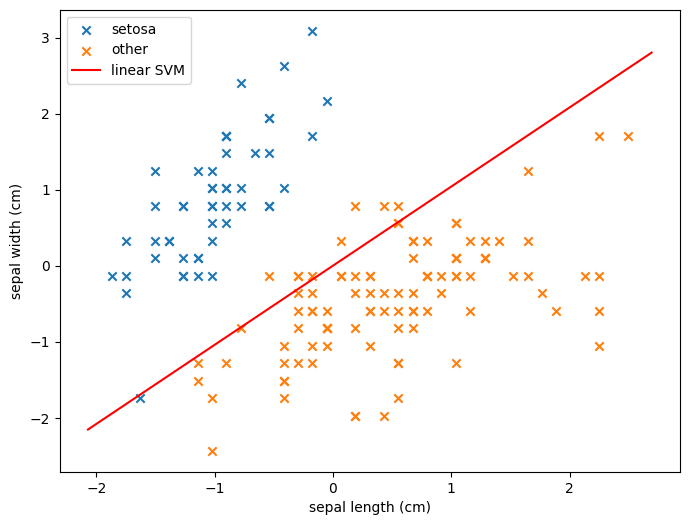

final result
	cost: 9391.958461650758, 
	theta: [ 0.         -8.23309076 15.44952597], 
	number of iterations: 30000, 
	gradient: 1700.109428834107
testing- eps: 0.01, alp: 0.01, C: 100


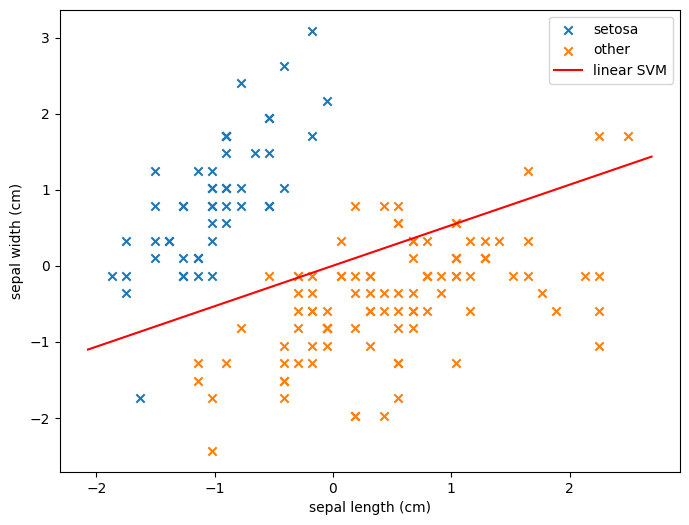

In [9]:
for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    costs_norm, thetas_norm = gradient_descent_svm(
        x_normalisiert, y, 3,
        linear_model, grad_linear_model,
        hinge_cost_function, grad_hinge_cost_function,
        epsilon=0.01, alpha=0.01,
        verbose=True, max_iterations=30000,
        C=C
    )
    plot_svm(x_normalisiert, y, thetas_norm[-1])


## MNIST

### Import

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Daten

In [11]:
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
X = mnist["data"].astype(float)/255.0
y = mnist["target"].astype(int)

#anzahl und form
print(f"X shape: {X.shape}")  # (70000, 784)
print(f"y shape: {y.shape}")  # (70000,)

X shape: (70000, 784)
y shape: (70000,)


### Plot- erste 10

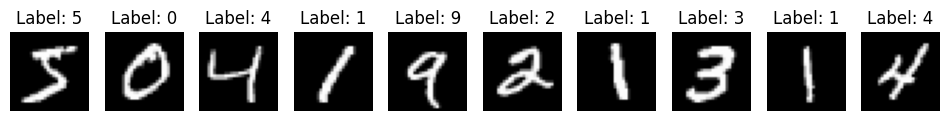

In [12]:
#erste 10
plt.figure(figsize=(12, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
    plt.title(f"Label: {y[i]}")
plt.show()

In [13]:
#letzte 10000
x_val = X[-10000:]
y_val = y[-10000:]

#alles außer val---als trainingsdaten
X_train_full = X[:-10000]
y_train_full = y[:-10000]

In [14]:
def get_train_data(num_train_points):
    if num_train_points > len(X_train_full):
        raise ValueError("Num_train_points größer als verfügbares Trainingsset.")

    x_train = X_train_full[:num_train_points]
    y_train = y_train_full[:num_train_points]
    return x_train, y_train

In [15]:
x_train, y_train = get_train_data(5000)
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}, y_val shape: {y_val.shape}")

x_train shape: (5000, 784), y_train shape: (5000,)
x_val shape: (10000, 784), y_val shape: (10000,)


### Accuracy

In [16]:
x_train_small, y_train_small = get_train_data(1000)
svm = SVC(kernel="linear") #lineare SVM
svm.fit(x_train_small, y_train_small)

y_pred = svm.predict(x_val)

acc = accuracy_score(y_val, y_pred)
print(f"\nAccuracy: {acc: .4f}")

print("\nClassification report: ")
print(classification_report(y_val, y_pred))


Accuracy:  0.8758

Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.94      0.97      0.95      1135
           2       0.87      0.90      0.88      1032
           3       0.87      0.78      0.82      1010
           4       0.87      0.88      0.88       982
           5       0.76      0.83      0.80       892
           6       0.93      0.91      0.92       958
           7       0.89      0.88      0.88      1028
           8       0.87      0.79      0.83       974
           9       0.80      0.84      0.82      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.88      0.88     10000



### Confusion Matrix


Confusion matrix:
[[ 948    0    5    1    4    8    8    3    2    1]
 [   0 1100    2    1    0    2    2    3   24    1]
 [  11   14  924   13   10    4   19   18   18    1]
 [   3    6   37  785    0  112    3   13   37   14]
 [   1    3    5    1  860    3   11    0    5   93]
 [   9    9   10   49   14  741   10    6   19   25]
 [   5    3   32    0   19   26  870    1    2    0]
 [   1   19   27   15   13    1    0  909    1   42]
 [  14   12   15   26   11   62   15   18  772   29]
 [   7    4   11   12   52   13    0   56    5  849]]


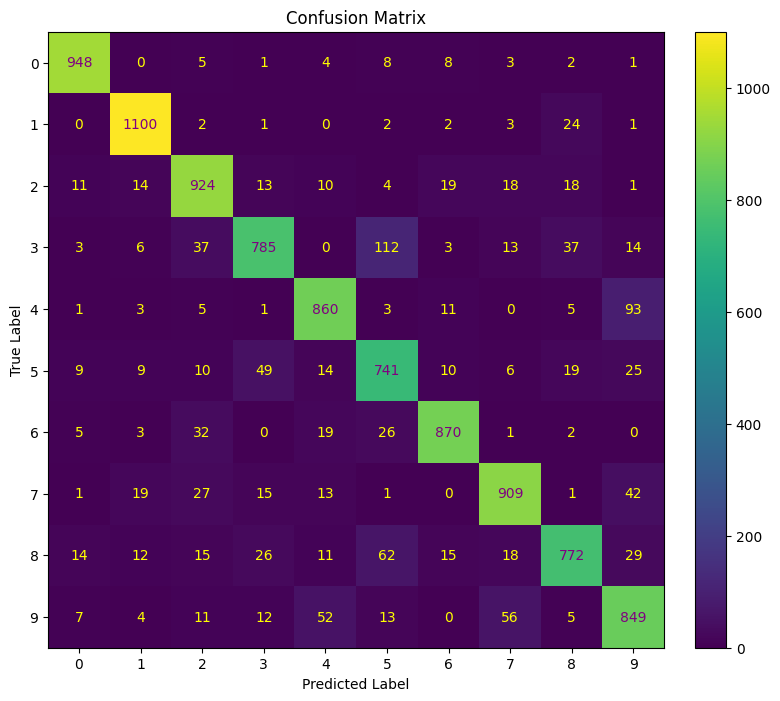

In [17]:
confusion = confusion_matrix(y_val, y_pred)
print("\nConfusion matrix:")
print(confusion)

plt.figure(figsize=(10,8))
im = plt.imshow(confusion, interpolation='nearest', cmap='viridis')
plt.title("Confusion Matrix")
plt.colorbar(im, fraction=0.046, pad=0.04)

#Achsenbeschriftung
classes = np.arange(10)  #0-9
plt.xticks(classes)
plt.yticks(classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

#zahlen
thresh = confusion.max() / 2.
for i in range(confusion.shape[0]):
    for j in range(confusion.shape[1]):
        plt.text(j, i, format(confusion[i, j], 'd'),
                 ha="center", va="center",
                 color="purple" if confusion[i, j] > thresh else "yellow")

plt.show()


### Accuracy vs Trainingsgröße

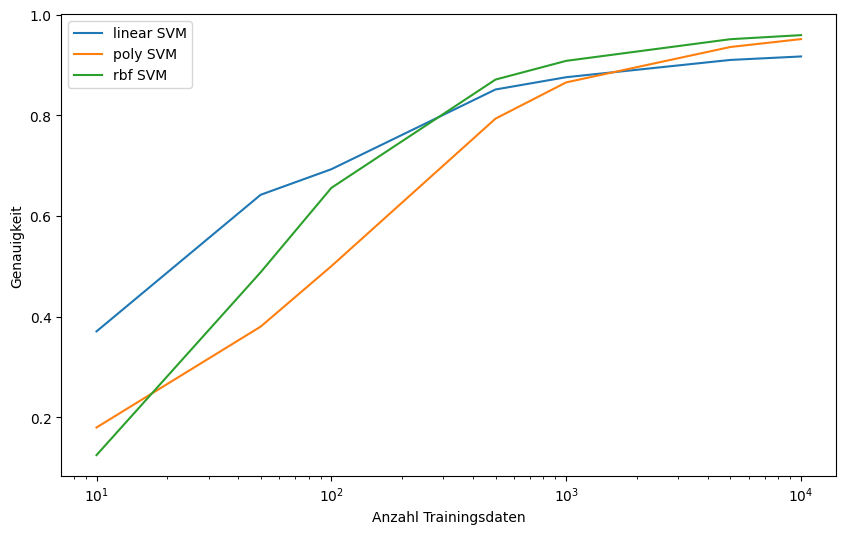

In [18]:
###accuracy vs trainingsgröße
train_nr = [10, 50, 100, 500, 1000, 5000, 10000]

kernels = ['linear', 'poly', 'rbf']
results = {k: [] for k in kernels}

#für trainingsgröße und jeden kernel -> accuracy speichern
for size in train_nr:
    x_train, y_train = get_train_data(size)

    for k in kernels:
        if k == 'poly':
            clf = SVC(kernel=k, degree=3, gamma='scale')
        else:
            clf = SVC(kernel=k, gamma='scale')
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_val)
        acc = accuracy_score(y_val, y_pred)
        results[k].append(acc)

#plot accuracy vs trainingsgröße
plt.figure(figsize=(10,6))
for k in kernels:
    plt.plot(train_nr, results[k], label=f'{k} SVM')

plt.xscale('log') #log skala für x-achse
plt.xlabel("Anzahl Trainingsdaten")
plt.ylabel("Genauigkeit")
plt.legend()
plt.show()

### C

In [19]:
C_values = np.logspace(-2, 2, 6) #0.01 bis 100
kernels = ['linear', 'poly', 'rbf']

results_acc_C = {k: [] for k in kernels}
results_sv_C = {k: [] for k in kernels}

x_train, y_train = get_train_data(1000)

for k in kernels:
    for C in C_values:
        if k == 'poly':
            clf = SVC(kernel=k, degree=3, gamma='scale', C=C)
        else:
            clf = SVC(kernel=k, gamma='scale', C=C)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_val)
        acc = accuracy_score(y_val, y_pred)
        results_acc_C[k].append(acc)
        results_sv_C[k].append(len(clf.support_))  #anzahl SV

### Accuracy vs C

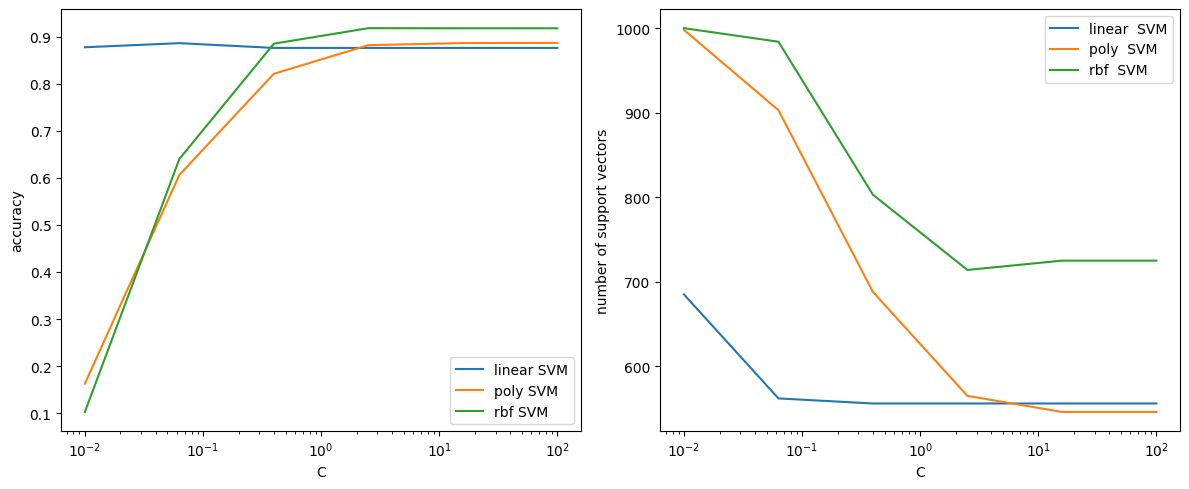

In [20]:
#accuracy vs C
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
for k in kernels:
    plt.plot(C_values, results_acc_C[k], label=f'{k} SVM')
plt.xscale('log')
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend()

#anzahl Support Vektoren vs C
plt.subplot(1,2,2)
for k in kernels:
    plt.plot(C_values, results_sv_C[k], label=f'{k}  SVM')
plt.xscale('log')
plt.xlabel("C")
plt.ylabel("number of support vectors")
plt.legend()

plt.tight_layout()
plt.show()

### Accuracy und Confusion Matrix


Accuracy: 0.9684


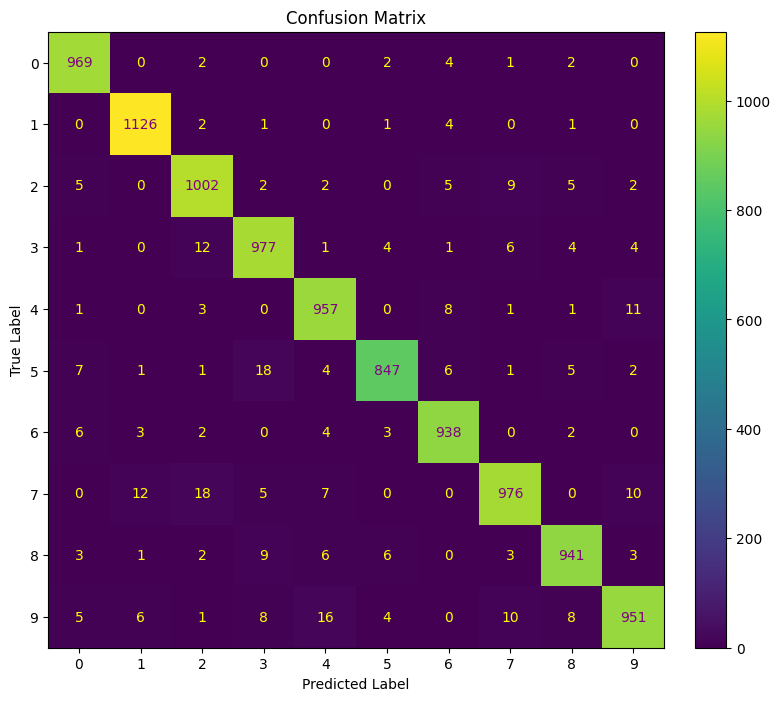

In [21]:
#10.000 size
x_train_opt, y_train_opt = get_train_data(10000)

#optimal: rbf
svm_opt = SVC(kernel='rbf', C=10, gamma='scale')
svm_opt.fit(x_train_opt, y_train_opt)

y_pred_opt = svm_opt.predict(x_val)

#accuracy
acc_opt = accuracy_score(y_val, y_pred_opt)
print(f"\nAccuracy: {acc_opt:.4f}")

#confusion Matrix
conf_mat_opt = confusion_matrix(y_val, y_pred_opt)
plt.figure(figsize=(10,8))
im = plt.imshow(conf_mat_opt, interpolation='nearest', cmap='viridis')
plt.colorbar(im, fraction=0.046, pad=0.04)
classes = np.arange(10)
plt.xticks(classes)
plt.yticks(classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
thresh = conf_mat_opt.max() / 2.
for i in range(conf_mat_opt.shape[0]):
    for j in range(conf_mat_opt.shape[1]):
        plt.text(j, i, format(conf_mat_opt[i, j], 'd'),
                 ha="center", va="center",
                 color="purple" if conf_mat_opt[i, j] > thresh else "yellow")
plt.show()

### Fehlerhafte Klassifikationen

Anzahl fehlerhafte Klassifikationen: 316


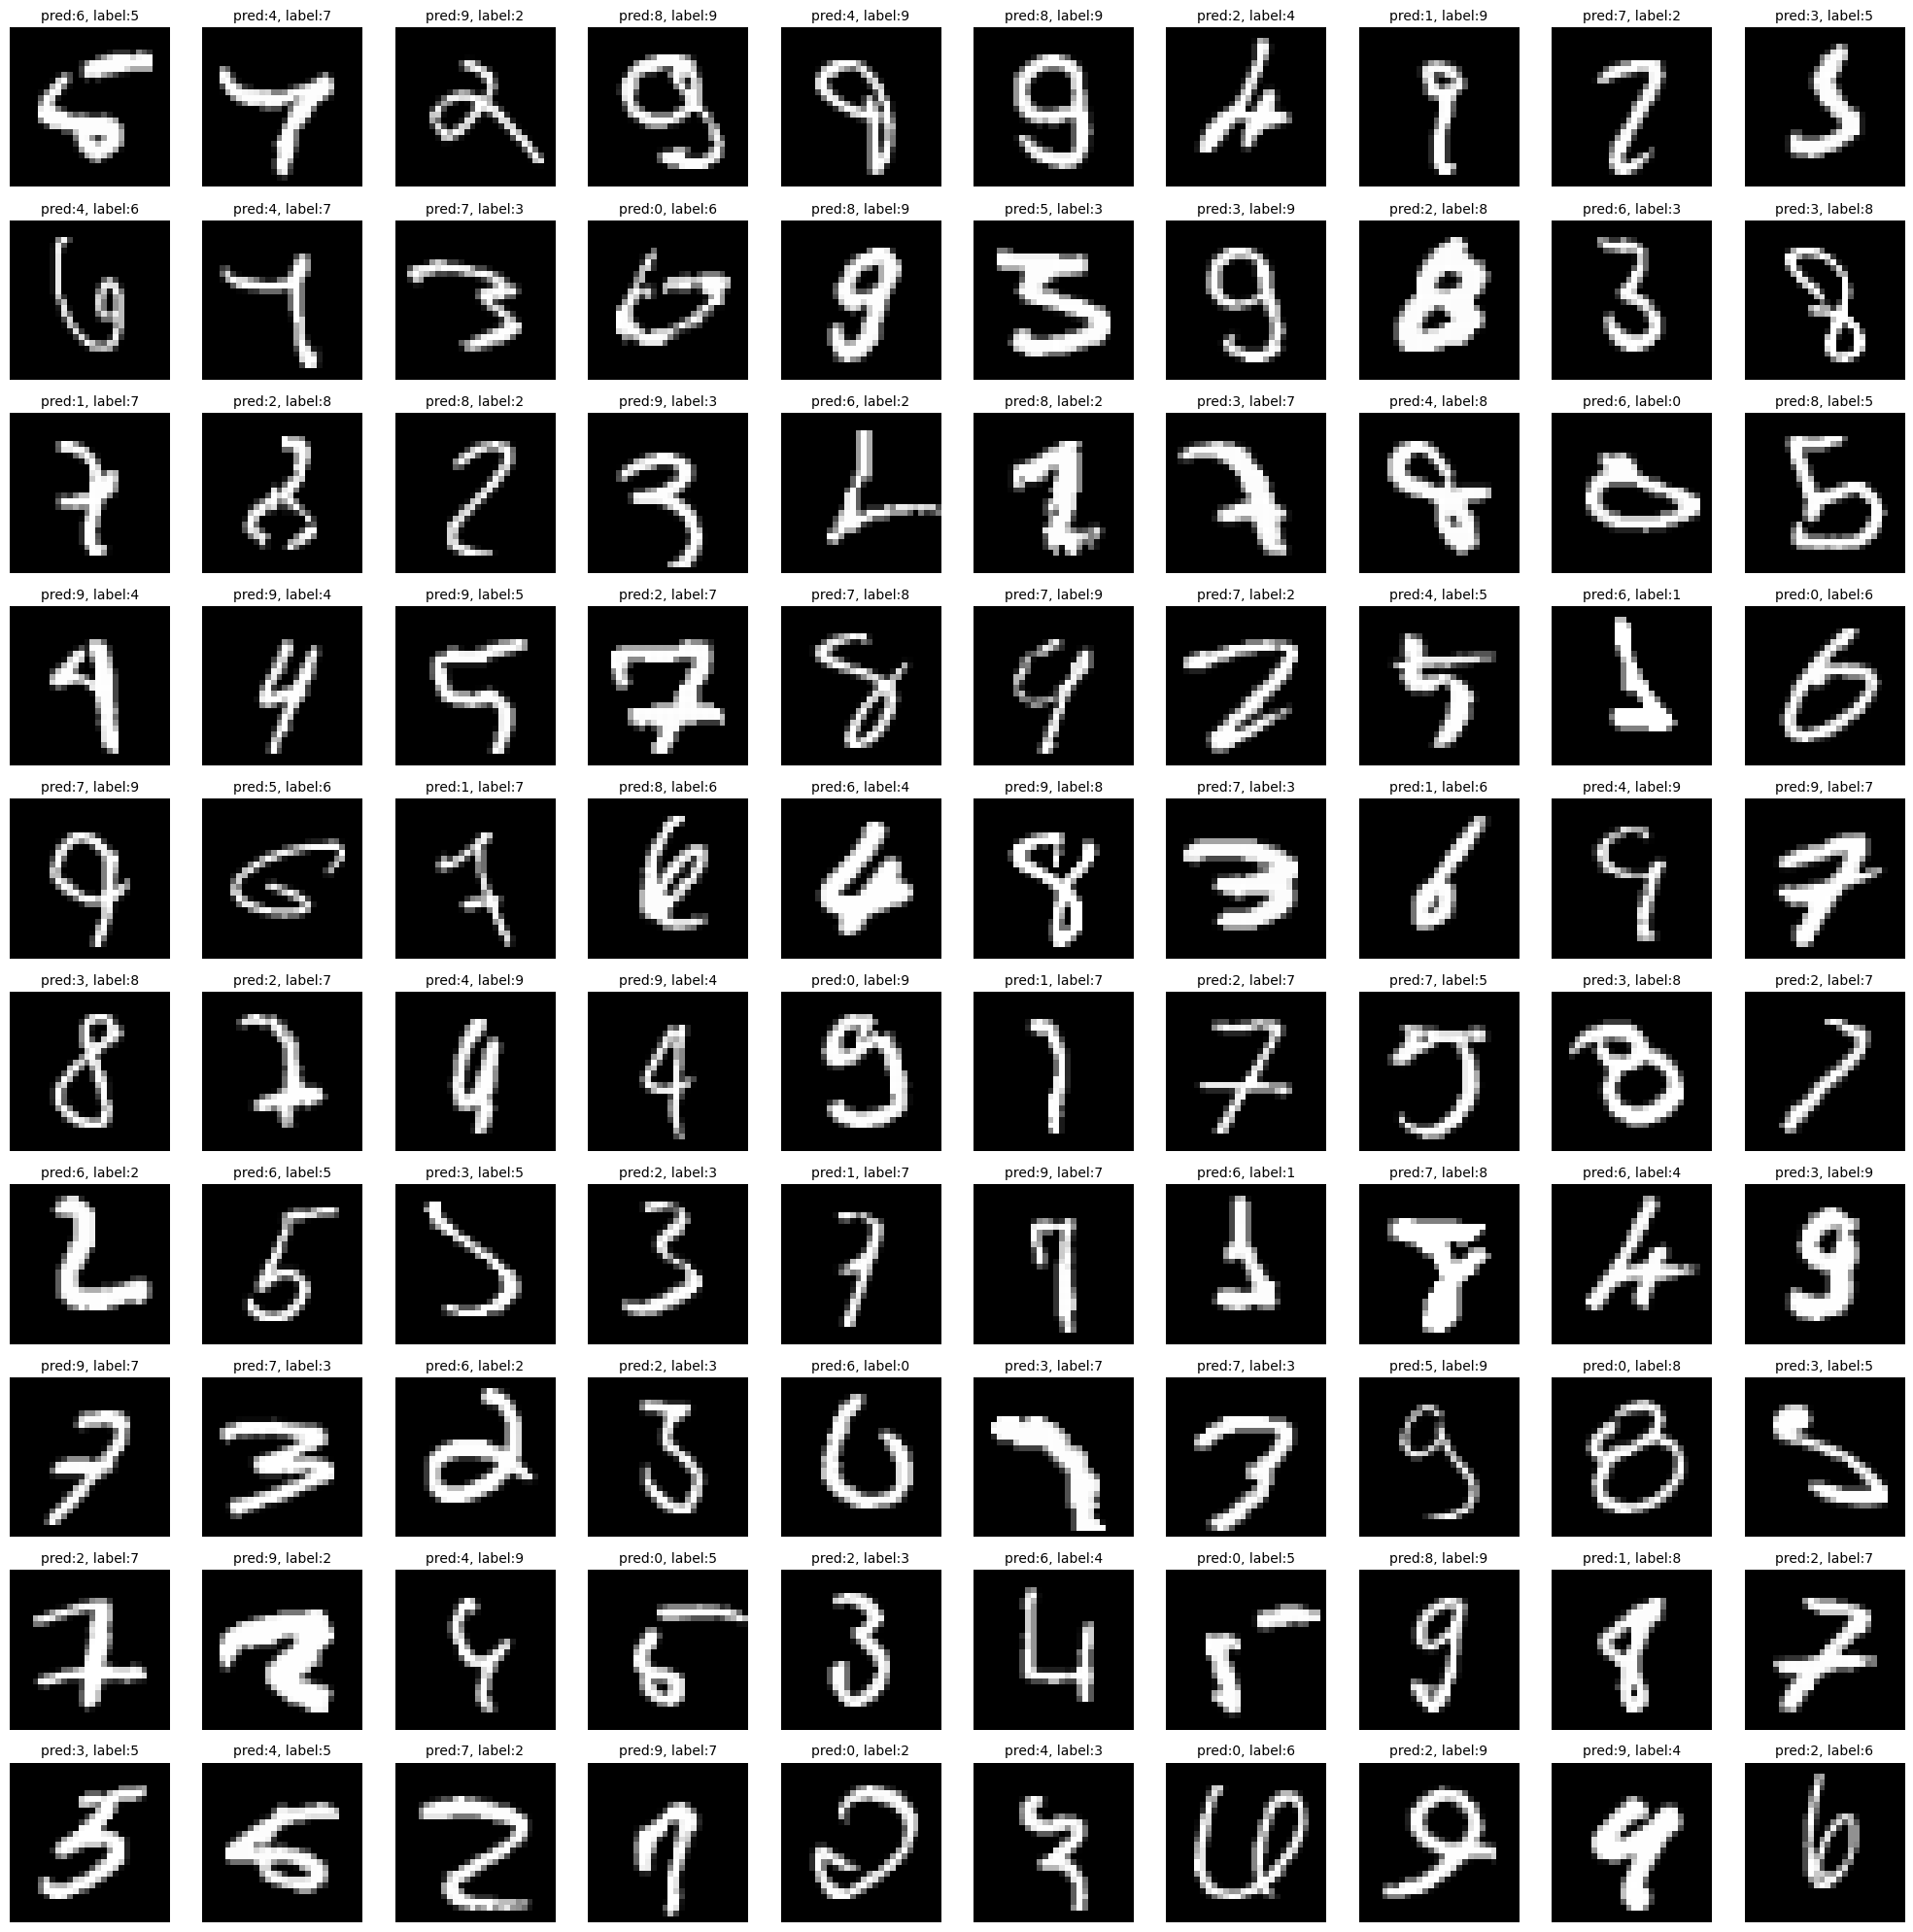

In [22]:
errors = np.where(y_pred_opt != y_val)[0]
print(f"Anzahl fehlerhafte Klassifikationen: {len(errors)}")
num_errors_to_plot = min(100, len(errors)) #100 fehler

plt.figure(figsize=(20, 20))
for i, idx in enumerate(errors[:num_errors_to_plot]):
    plt.subplot(10, 10, i + 1)
    plt.imshow(x_val[idx].reshape(28, 28), cmap='gray')
    plt.axis('off')

    #pred vs label
    plt.title(f"pred:{y_pred_opt[idx]}, label:{y_val[idx]}", fontsize=10)

plt.tight_layout()
plt.show()